<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset Info:
 None
Null values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Target classes:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

K = 1
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

K = 2
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K = 3
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K = 4
Accuracy: 1.0
Confusion 

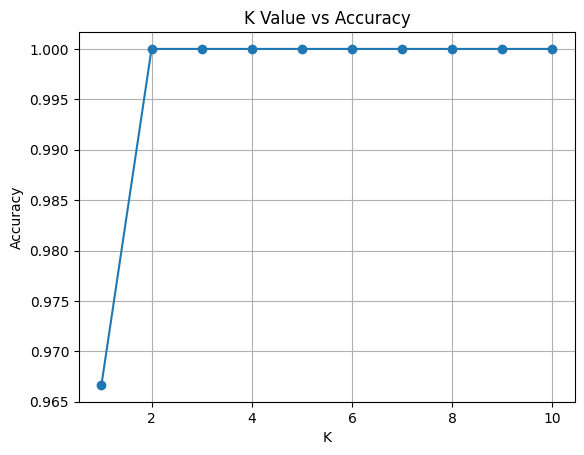

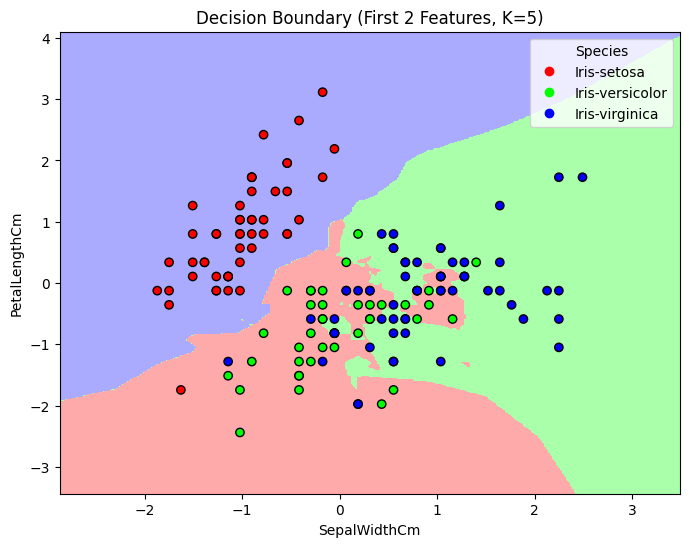

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

#load dataset
df = pd.read_csv('/content/sample_data/Iris.csv')  # Adjust path if needed
df.drop('Id', axis=1, inplace=True)  # Drop unnecessary column

#basic info
print("Dataset Info:\n", df.info())
print("Null values:\n", df.isnull().sum())
print("Target classes:\n", df['Species'].value_counts())

#split features and target
X = df.drop('Species', axis=1)
y = df['Species']

#normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#train KNN and Evaluate for Multiple K Values
k_range = range(1, 11)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"\nK = {k}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# plot Accuracy vs K
plt.plot(k_range, accuracies, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

#visualize Decision Boundaries
#using only 2 features for visualization
X_vis = X_scaled[:, :2]
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_v, y_train_v)

#create mesh grid
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.factorize(Z)[0]  #convert string labels to integers
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# plot training points
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y)[0], cmap=cmap_bold, edgecolor='k')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.title("Decision Boundary (First 2 Features, K=5)")
plt.legend(handles=list(scatter.legend_elements()[0]),
           labels=list(df['Species'].unique()), title="Species")
plt.show()
